<a href="https://colab.research.google.com/github/vishesh711/Machine-Learning-Practice/blob/main/Hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Hyperparameters are parameters that control the learning process and are set before the training process begins, unlike model parameters which are learned during training.

Effective hyperparameter tuning can lead to significant performance gains for a model, but it can be computationally expensive. Some common hyperparameters include the number of trees in a Random Forest, the learning rate for Gradient Boosting, and the regularization strength in Logistic Regression.

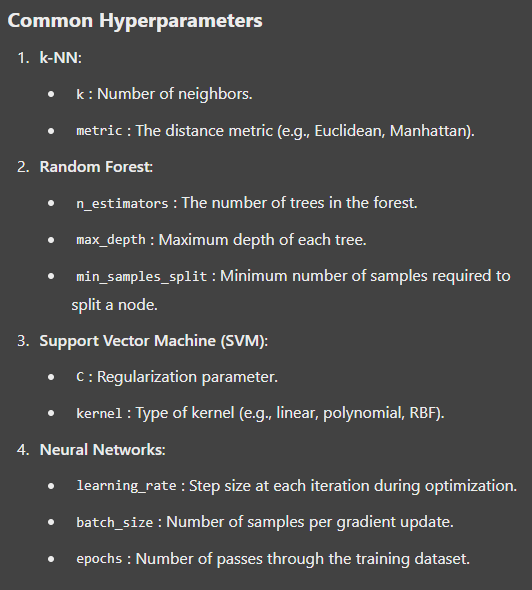

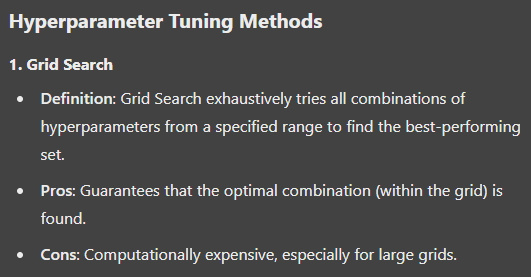

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generating synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Applying Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Displaying best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.89


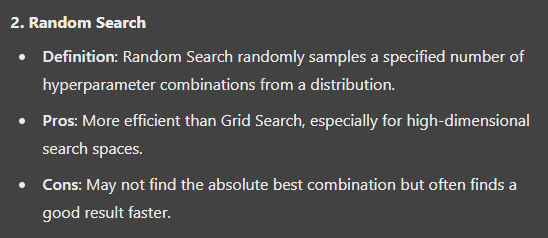

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Generating synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Defining hyperparameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 11)
}

# Applying Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Displaying best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.2f}")


Best Parameters: {'max_depth': 43, 'min_samples_split': 5, 'n_estimators': 102}
Best Accuracy: 0.89


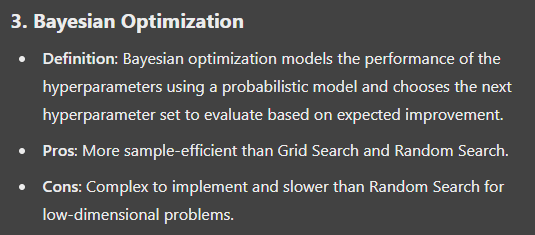

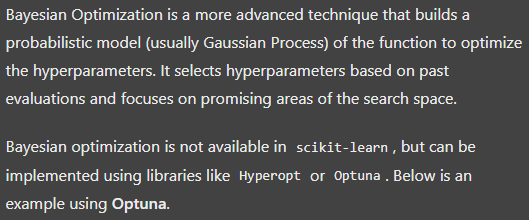

In [5]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


In [6]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score

# Generating synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Random Forest model with trial hyperparameters
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, bootstrap=bootstrap, random_state=42)

    # Cross-validation score
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Best hyperparameters and score
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Cross-Validation Accuracy: {study.best_value}")

# Train final model with best hyperparameters
best_rf = RandomForestClassifier(**study.best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluating on test data
test_score = best_rf.score(X_test, y_test)
print(f"Test Accuracy: {test_score}")


[I 2024-09-28 22:27:39,748] A new study created in memory with name: no-name-8151112b-9f91-4215-bc8f-659bb5252093
[I 2024-09-28 22:27:48,228] Trial 0 finished with value: 0.9025000000000001 and parameters: {'n_estimators': 166, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.9025000000000001.
[I 2024-09-28 22:27:50,394] Trial 1 finished with value: 0.8924999999999998 and parameters: {'n_estimators': 69, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.9025000000000001.
[I 2024-09-28 22:27:58,642] Trial 2 finished with value: 0.9000000000000001 and parameters: {'n_estimators': 182, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.9025000000000001.
[I 2024-09-28 22:28:02,761] Trial 3 finished with value: 0.89875 and parameters: {'n_estimators': 155, 'max_depth': 15, 'min_samples_split': 9, 'm

Best Hyperparameters: {'n_estimators': 166, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.9025000000000001
Test Accuracy: 0.895


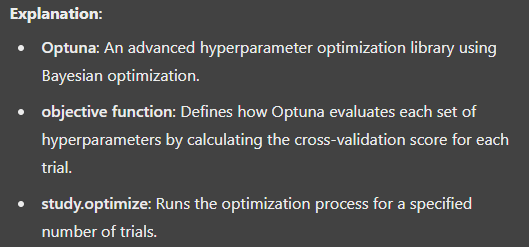

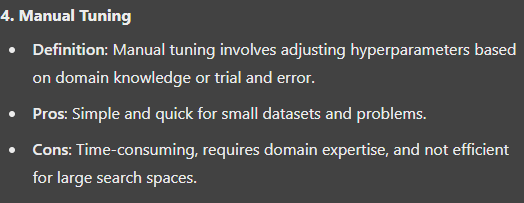

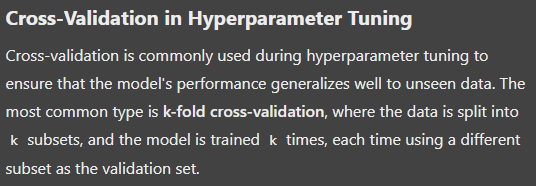

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Applying 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.8375  0.91875 0.9     0.8875  0.9125 ]
Mean CV Accuracy: 0.89


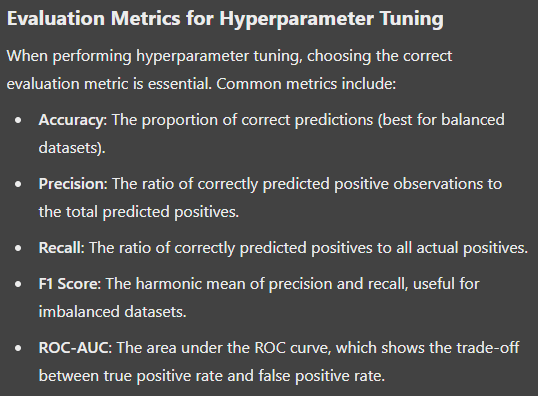

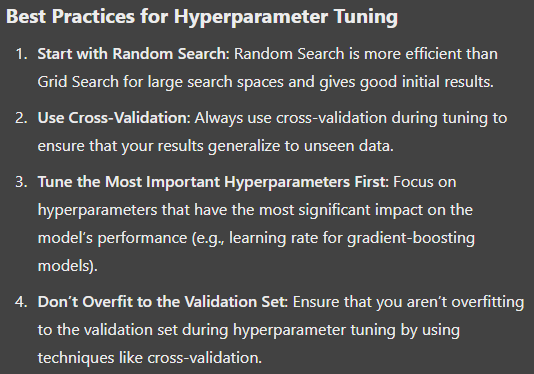

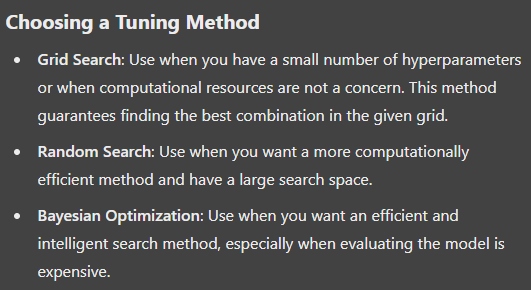

###Conclusion
Hyperparameter tuning is a crucial step in optimizing machine learning models. By selecting the best set of hyperparameters, we can improve model performance and generalization. There are various methods for hyperparameter tuning, such as Grid Search, Random Search, and Bayesian Optimization, each with its own pros and cons.